In [82]:
import os

import pandas as pd
import pdfplumber

COLUMNS = ["Emission Source", "Air Contaminant Name", "Emission Rate lbs/hr", "Emission Rate tons/year"]

### Two major formats

Let's start with the friendlier one

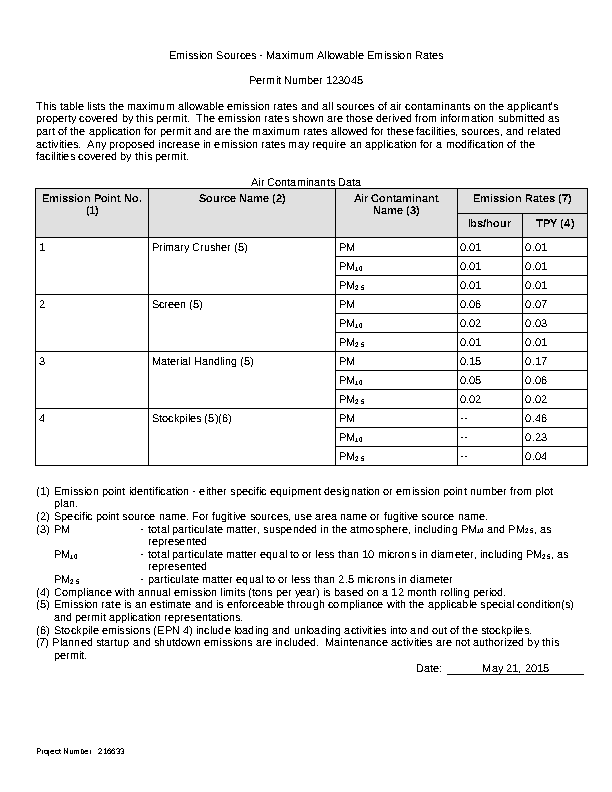

In [83]:
pdf = pdfplumber.open(os.path.expanduser("~/data/texas_air/tceq/pdf/5327403.pdf"))
pdf.pages[0].to_image()

In [85]:
rows = pdf.pages[0].extract_table()[2:]
rows = [[f"{row[0]}: {row[1]}"]  + row[2:] if row[0] is not None else [""] + row[2:] for row in rows]
df = pd.DataFrame(rows, columns=COLUMNS)
df["Emission Source"].replace('', pd.NA, inplace=True)
df["Emission Source"].fillna(method="ffill", inplace=True)
df

,Emission Source,Air Contaminant Name,Emission Rate lbs/hr,Emission Rate tons/year
0,1: Primary Crusher (5),PM,0.01,0.01
1,1: Primary Crusher (5),PM\n10,0.01,0.01
2,1: Primary Crusher (5),PM\n2.5,0.01,0.01
3,2: Screen (5),PM,0.06,0.07
4,2: Screen (5),PM\n10,0.02,0.03
5,2: Screen (5),PM\n2.5,0.01,0.01
6,3: Material Handling (5),PM,0.15,0.17
7,3: Material Handling (5),PM\n10,0.05,0.06
8,3: Material Handling (5),PM\n2.5,0.02,0.02
9,4: Stockpiles (5)(6),PM,--,0.46


### Second major format

This one seems a bit older and is not well formatted

In [77]:
pdf = pdfplumber.open(os.path.expanduser("~/data/texas_air/tceq/pdf/5131471.pdf"))

In [78]:
p0 = pdf.pages[0]
text_0 = p0.extract_text()

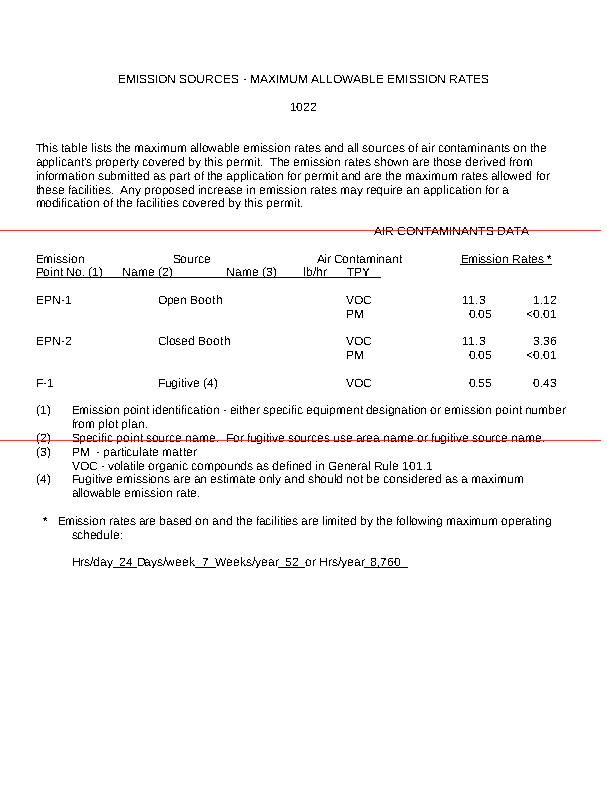

In [79]:
im = p0.to_image()
im.draw_line(((0, 230), (600, 230)))
im.draw_line(((0, 440), (600, 440)))


In [80]:
lines = text_0.split("\n")
start = [i for i, line in enumerate(lines) if line.strip().lower() == "air contaminants data"][0]

# Find first row ending in a number
while True:
    if lines[start].strip()[-1].isdigit():
        break
    start += 1

end = [i for i, line in enumerate(lines) if i > start and "emission point identification" in line.lower()][0]

rows = [line.strip().split() for line in lines[start:end]]
print(rows)
def tonum(x):
    try:
        return float(x)
    except:
        return float("nan")
    
rows = [(" ".join(rr[:-3]), rr[-3], tonum(rr[-2]), tonum(rr[-1])) for rr in rows]
last_non_none = None
new_rows = []
for row in rows:
    if row[0] is not None:
        last_non_none = row[0]
    elif row[0] is None:
        row[0] = last_non_none
    new_rows.append(row)
rows = new_rows
df = pd.DataFrame(rows, columns=COLUMNS)
df["Emission Source"].replace('', pd.NA, inplace=True)
df["Emission Source"].fillna(method="ffill", inplace=True)
df

[['EPN-1', 'Open', 'Booth', 'VOC', '11.3', '1.12'], ['PM', '0.05', '<0.01'], ['EPN-2', 'Closed', 'Booth', 'VOC', '11.3', '3.36'], ['PM', '0.05', '<0.01'], ['F-1', 'Fugitive', '(4)', 'VOC', '0.55', '0.43']]


,Emission Source,Air Contaminant Name,Emission Rate lbs/hr,Emission Rate tons/year
0,EPN-1 Open Booth,VOC,11.30,1.12
1,EPN-1 Open Booth,PM,0.05,NaN
2,EPN-2 Closed Booth,VOC,11.30,3.36
3,EPN-2 Closed Booth,PM,0.05,NaN
4,F-1 Fugitive (4),VOC,0.55,0.43
